0it [00:00, ?it/s]WARNING:matplotlib.legend:No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
4it [00:10,  2.62s/it]


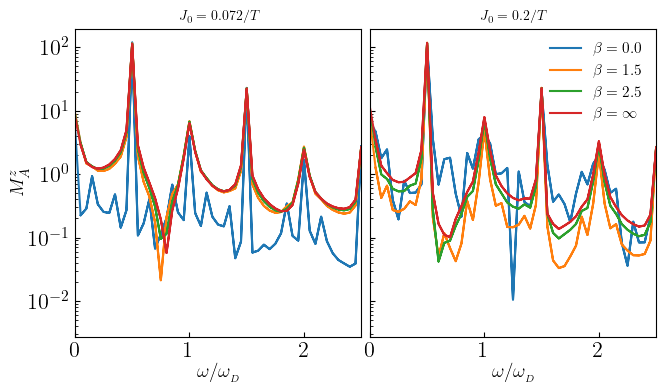

CPU times: user 1.13 s, sys: 277 ms, total: 1.41 s
Wall time: 11.5 s


In [ ]:
%%time
from qutip import *
import numpy as np
from scipy import signal
import random
import matplotlib.pyplot as plt
from scipy.special import jn_zeros
from itertools import combinations
from multiprocessing import Pool
from tqdm import tqdm
from funcs import *


freezing_pts = jn_zeros(0, 3)
plt.rcParams.update({"figure.figsize": (7.5, 4),"text.usetex": True,"font.family": "sans-serif",
    "font.size": 16,"font.sans-serif": ["Helvetica"]})


def fourier_transform(data, d):
    n = len(data)
    frequencies = np.fft.fftfreq(n, d)
    fft_values = np.fft.fft(data)    
    return frequencies, fft_values

N = 8
N1= int(N/2)
N2= N-N1
omega = 20.0
w = omega
T = 2 * np.pi/w
steps = 201
times = np.linspace(0, 20 * T, steps, endpoint=False)
d = 1/steps

ea, eb = 0.03, 0.9
lambd_y = 0
lambd_x = 0

ft = 10   
g = np.pi/T
Jvalues = [0.072/T, 0.2/T]   
Jlbl = [r'$J_0 = 0.072/T$',r'$J_0=0.2/T$'] 
betas = [0, 1.5, 2.5, float('inf')]
fig, axs = plt.subplots(1,2, sharey=True, sharex=True)
plt.subplots_adjust(wspace=0.03, hspace=0.0)

for bt, beta in tqdm(enumerate(betas)):    
    for jh,Jvalue in enumerate(Jvalues):
        nprocs = N1
        p = Pool(processes = nprocs) 
        opts = Options(nsteps=1e5, num_cpus=1, openmp_threads=1)

        spinposition_A = [0,1,2,3]
        spinposition_B = [4,5,6,7] 

        h0 = 0.0
        h = freezing_pts[0] * w/4 
        sx,sy,sz = sigmax(), sigmay(), sigmaz()
        sz_os = [] 
        for m,i in enumerate(spinposition_A):
            id = qeye(2**i)    
            dim12 = N-1-i
            id1 = qeye(2**dim12)
            sz_os.append(Qobj(tensor(id,tensor(sz,id1)).full()))

        params = [{'h0':0, 'h':h, 'omega':omega, 'N':N,'N1':N1,\
                   'opts':opts, 'sz_o':sz_o, 'lambd_y':lambd_y,\
                   'lambd_x':lambd_x, 'Jvalue':Jvalue,'beta':beta,\
                   'g':g,'ea':ea,'eb':eb, 'times':times} for sz_o in sz_os]

        data2 = p.map(run_dynm,params)
        mz_dt = [data2[m][0] for m in range(N1)]
        mz_data = np.sum(mz_dt, axis=0) * 2/N
        frq, fftq = [], []
        frequencies, fft_values = fourier_transform(mz_data, d)
        
        if bt == 3:
            axs[jh].plot(np.abs(frequencies)/w, np.abs(fft_values), label = fr"$\beta=\infty$")
        else:
            axs[jh].plot(np.abs(frequencies)/w, np.abs(fft_values), label = fr"$\beta={beta:1.1f}$")
        axs[-1].legend(frameon=False, fontsize=11)
        
        
        axs[jh].tick_params(which='both', axis="x", direction="in")
        axs[jh].tick_params(which='both', axis="y", direction="in")
        axs[jh].set_title(Jlbl[jh], fontsize= 10)
        axs[jh].set_yscale('log')
        axs[0].set_xlabel(r"$\omega/\omega_{_{D}}$", fontsize = 14, labelpad= 0.5)
        axs[1].set_xlabel(r"$\omega/\omega_{_{D}}$", fontsize = 14, labelpad= 0.5)
        
    axs[0].set_ylabel(r"$M^z_{A}$",fontsize = 14, labelpad= 0.0)  

plt.savefig('clean_J_strong_MzAB_betas.pdf', bbox_inches='tight', pad_inches=0.0, dpi = 600)
plt.savefig('clean_J_strong_MzAB_betas.svg', bbox_inches='tight', pad_inches=0.0, dpi = 600)

plt.xlim(0,2.5)
plt.savefig('sz_fft.pdf', bbox_inches='tight', pad_inches=0.0, dpi = 600)
plt.show()

## SZ local 

0it [00:00, ?it/s]WARNING:matplotlib.legend:No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
4it [00:10,  2.55s/it]


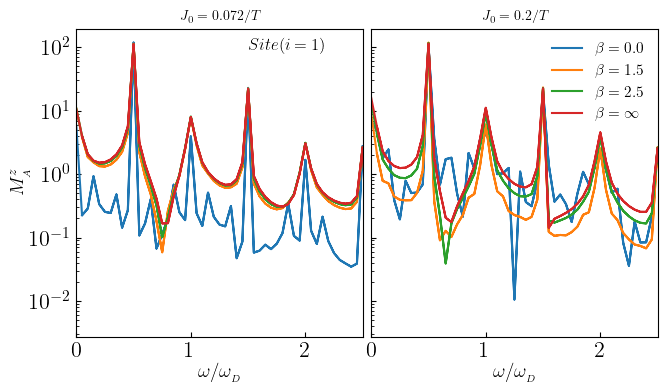

CPU times: user 10.9 s, sys: 408 ms, total: 11.4 s
Wall time: 12.8 s


In [8]:
%%time
from qutip import *
import numpy as np
from scipy import signal
import random
import matplotlib.pyplot as plt
from scipy.special import jn_zeros
from itertools import combinations
from multiprocessing import Pool
from tqdm import tqdm
from funcs import *


freezing_pts = jn_zeros(0, 3)
plt.rcParams.update({"figure.figsize": (7.5, 4),"text.usetex": True,"font.family": "sans-serif",
    "font.size": 16,"font.sans-serif": ["Helvetica"]})


def fourier_transform(data, d):
    n = len(data)
    frequencies = np.fft.fftfreq(n, d)
    fft_values = np.fft.fft(data)    
    return frequencies, fft_values

N = 8
N1= int(N/2)
N2= N-N1
omega = 20.0
w = omega
T = 2 * np.pi/w
steps = 201
times = np.linspace(0, 20 * T, steps, endpoint=False)
d = 1/steps

ea, eb = 0.03, 0.9
lambd_y = 0
lambd_x = 0

ft = 10   
g = np.pi/T
Jvalues = [0.072/T, 0.2/T]   
Jlbl = [r'$J_0 = 0.072/T$',r'$J_0=0.2/T$'] 
betas = [0, 1.5, 2.5, float('inf')]
fig, axs = plt.subplots(1,2, sharey=True, sharex=True)
plt.subplots_adjust(wspace=0.03, hspace=0.0)

for bt, beta in tqdm(enumerate(betas)):    
    for jh,Jvalue in enumerate(Jvalues):
        nprocs = N1
        p = Pool(processes = nprocs) 
        opts = Options(nsteps=1e5, num_cpus=1, openmp_threads=1)

        spinposition_A = [1]
        ia = spinposition_A[0]
        spinposition_B = [4] 

        h0 = 0.0
        h = freezing_pts[0] * w/4 
        sx,sy,sz = sigmax(), sigmay(), sigmaz()

        i = ia
        id = qeye(2**i)    
        dim12 = N-1-i
        id1 = qeye(2**dim12)
        sz_o = Qobj(tensor(id,tensor(sz,id1)).full())

        params = {'h0':0, 'h':h, 'omega':omega, 'N':N,'N1':N1,\
                   'opts':opts, 'sz_o':sz_o, 'lambd_y':lambd_y,\
                   'lambd_x':lambd_x, 'Jvalue':Jvalue,'beta':beta,\
                   'g':g,'ea':ea,'eb':eb, 'times':times}

        data2 = run_dynm(params)
        mz_dt = data2[0] 
        mz_data = mz_dt
        frequencies, fft_values = fourier_transform(mz_data, d)
        
        if bt == 3:
            axs[jh].plot(np.abs(frequencies)/w, np.abs(fft_values), label = fr"$\beta=\infty$")
        else:
            axs[jh].plot(np.abs(frequencies)/w, np.abs(fft_values), label = fr"$\beta={beta:1.1f}$")
        axs[-1].legend(frameon=False, fontsize =11)
        
        
        axs[jh].tick_params(which='both', axis="x", direction="in")
        axs[jh].tick_params(which='both', axis="y", direction="in")
        axs[jh].set_title(Jlbl[jh], fontsize= 10)
        axs[jh].set_yscale('log')
        axs[0].set_xlabel(r"$\omega/\omega_{_{D}}$", fontsize = 14, labelpad= 0.5)
        axs[1].set_xlabel(r"$\omega/\omega_{_{D}}$", fontsize = 14, labelpad= 0.5)
        
    axs[0].set_ylabel(r"$M^z_{_{A}}$",fontsize = 14, labelpad= 0.0)  

plt.savefig('clean_J_strong_MzAB_betas.pdf', bbox_inches='tight', pad_inches=0.0, dpi = 600)
plt.savefig('clean_J_strong_MzAB_betas.svg', bbox_inches='tight', pad_inches=0.0, dpi = 600)
axs[0].text(1.5, 90.0, fr"$Site(i={spinposition_A[0]:1d})$", fontsize=12,\
            bbox=dict(facecolor='white', alpha=1.0, edgecolor='white'))


plt.xlim(0,2.5)
plt.savefig('single_sz_fft.pdf', bbox_inches='tight', pad_inches=0.0, dpi = 600)
plt.show()